In [794]:
import numpy as np
import pandas as pd
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler

# ---

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.pipeline import Pipeline

# ---

import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score, roc_curve, auc, confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score
from sklearn import tree

# ---

from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
import statsmodels.discrete.discrete_model as sm

# ---

import six
import sys
sys.modules['sklearn.externals.six'] = six

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import make_pipeline

# ---

from sklearn.linear_model import LogisticRegression

# ---

import xgboost as xgb
from xgboost import plot_tree
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [213]:
data = pd.read_csv('stops.csv')
target = pd.read_csv('labels.csv')

In [216]:
target.value_counts()

Frisk Flag
N             34660
Y             10058
-               478
dtype: int64

In [16]:
labels['Frisk_Flag'] = labels['Frisk Flag']

In [17]:
labels = labels.drop('Frisk Flag', axis=1)

In [18]:
for i in labels['Frisk_Flag']:
    if i == 'Y':
        labels['Frisk_Flag'] = labels['Frisk_Flag'].replace(i, 1)
    if i == 'N':
        labels['Frisk_Flag'] = labels['Frisk_Flag'].replace(i, 0)
    if i == '-':
        labels['Frisk_Flag'] = labels['Frisk_Flag'].replace('-', 1)

In [259]:
labels

,Frisk_Flag
0,0
1,0
2,1
3,0
4,0
...,...
45191,0
45192,0
45193,0
45194,0


In [355]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.30, random_state=42)

In [356]:
dummy_clf = DummyClassifier(strategy = 'stratified')
dummy_clf.fit(X_train, y_train)

DummyClassifier(strategy='stratified')

In [357]:
dum_predictor = dummy_clf.predict(X_test)
print(np.unique(dum_predictor))

[0 1]


In [358]:
dummy_clf.score(X_train, y_train)

0.6407687201694219

In [359]:
# All scores - Function

# accuracy score
# f1 score
# precision score
# recall score

def scoring(train, pred):
    
    accuracy = accuracy_score(train, pred)
    f1 = f1_score(train, pred)
    precision = precision_score(train, pred)
    recall = recall_score(train, pred)
    
    print(f'Accuracy score is: {accuracy}')
    print('---')
    print(f'F1 score is: {f1}')
    print(f'Precision score is: {precision}')
    print(f'Recall score is: {recall}')

In [360]:
# Baseline model scores for F1, Precision and Recall
scoring(y_test, dum_predictor)

Accuracy score is: 0.6472453720775868
---
F1 score is: 0.23655227454110136
Precision score is: 0.23780487804878048
Recall score is: 0.23531279771355987


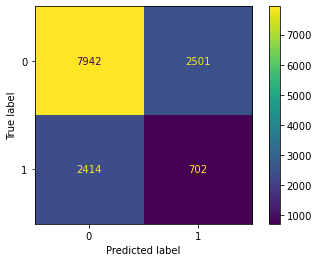

In [368]:
plot_confusion_matrix(dummy_clf, y_test, dum_predictor)  
plt.show()

Dummy Classifier Baseline Model: 0.64
--

Due to accuracy score being an unreliable metric for evaluating how effective the model is.
<br>
Interested in the metrics of F1, Recall & Precision. As of now, unsure of which one to place sole focus on.
<br>
<br>
The confusion matrix above shows a significant number of False Negatives and False Positives. This is an indicator of class imbalance in the dataset.
<br>
There is support here to SMOTE the data, with oversampling minority class, undersampling majority class, or both.
<br>
But first, I'd like to know the metrics for the dataset when using the standard hyperparameters for a few more models.

---
---
---

Model #1: KNN -- No Tuning
--
Reasoning: Because KNN doesn't require training so to speak, I'd like to see how it performs as a baseline model. 

Vanilla model, n_neighbors = 5 (standard)

In [229]:
# Scaling data for KNN 

scaler = StandardScaler()

scaled_data_train = scaler.fit_transform(X_train)
scaled_data_test = scaler.transform(X_test)

# Convert into a DataFrame
scaled_df_train = pd.DataFrame(scaled_data_train, columns=features.columns)

In [230]:
clf = KNeighborsClassifier()
clf.fit(scaled_data_train, y_train)

KNeighborsClassifier()

In [232]:
test_predictors = clf.predict(scaled_data_test)
test_predictors

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [233]:
scoring(y_test, test_predictors)

Accuracy score is: 0.7295523268677631
---
F1 score is: 0.22259910960356158
Precision score is: 0.33482142857142855
Recall score is: 0.16671959352175295


Major Difference: Accuracy vs. The Others
--

It's clear here that something must be adjusted.
In order to increase the F1, Precision and Recall metrics.

As well, for KNN, the Precision score has increased a bit, to 0.33
However, the Recall score has decreased, to 0.167

---
---
---

Model #2: Decision Trees -- No Tuning
--

- One of the benefits of using this model is to understand feature importance potentially.

In [372]:
clf_dt = DecisionTreeClassifier(random_state=42)  
clf_dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [379]:
dt_y_pred = clf_dt.predict(X_test)

In [380]:
acc = accuracy_score(y_test,dt_y_pred) * 100
print('Accuracy is :{0}'.format(acc))

Accuracy is :74.17213658824397


In [381]:
clf_dt.feature_importances_

array([0.02543429, 0.0358338 , 0.0353036 , 0.04499333, 0.03785072,
       0.02448843, 0.01905301, 0.01944136, 0.01664356, 0.02299654,
       0.01687799, 0.01116959, 0.00216902, 0.01525887, 0.0059328 ,
       0.01336941, 0.02081464, 0.06283984, 0.0043273 , 0.01033214,
       0.00438569, 0.00040038, 0.00697416, 0.00070571, 0.04163661,
       0.04264425, 0.03566953, 0.04689917, 0.0405449 , 0.05039414,
       0.04523814, 0.0377226 , 0.03140154, 0.04108977, 0.03609377,
       0.03969267, 0.03116288, 0.02221382])

<AxesSubplot:>

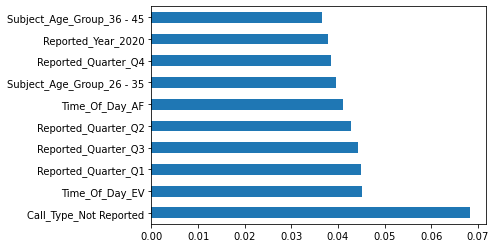

In [544]:
feat_imps = pd.Series(clf_dt.feature_importances_, index=X_train.columns)
feat_imps.nlargest(10).plot(kind='barh')

In [382]:
print(np.unique(dt_y_pred))

[0 1]


In [388]:
confusion_matrix(y_test, dt_y_pred)

array([[9635,  775],
       [2727,  422]], dtype=int64)

In [390]:
scoring(y_test, dt_y_pred)

Accuracy score is: 0.7417213658824398
---
F1 score is: 0.194201564657156
Precision score is: 0.35254803675856305
Recall score is: 0.1340107970784376


Evaluating Confusion Matrix:
--

- High number of true negatives, which further reveals significant class imbalance.
- Precision score remains constant
- Could precision be lost with dataset as Recall and F1 are improved?

In [391]:
# Checking AUC 
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, dt_y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('\nAUC is :{0}'.format(round(roc_auc, 2)))


AUC is :0.53


Addressing Class Imbalance: SMOTE Data
--

By deciding to evaluate Recall, Precision & F1 scores, I've discovered how much of a problem this dataset has with class imbalance. Many machine learning models -- I'm learning -- optimize for accuracy score, and so this score can be very misleading. I did notice the class imbalance before by checking the "value_counts" of the label, but I did not realize how it would impact the model performance.
<br>
<b>I'll need to SMOTE the data here.</b>

In [247]:
# https://stackoverflow.com/questions/61867945/python-import-error-cannot-import-name-six-from-sklearn-externals
# to successfully use SMOTE

import six
import sys
sys.modules['sklearn.externals.six'] = six

In [392]:
smotr = SMOTE()

In [393]:
# SMOTE the data
X_train_smoted, y_train_smoted = smotr.fit_sample(X_train.values, y_train.values)

Analyzing SMOTE Data: Can Decision Tree Model Be Improved?
--

Now, I'll evaluate the new SMOTE data train sample.

In [394]:
dt_smote_clf = clf_dt.fit(X_train_smoted, y_train_smoted)

In [395]:
dt_preds = clf_dt.predict(X_test)

In [396]:
scoring(y_test, dt_preds)

Accuracy score is: 0.6714359466037318
---
F1 score is: 0.3281556326345951
Precision score is: 0.31246410109132683
Recall score is: 0.3455065100031756


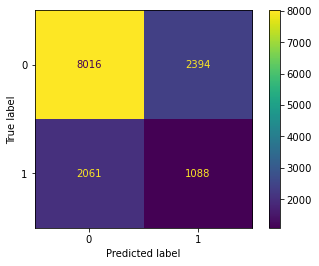

In [397]:
plot_confusion_matrix(clf_dt, X_test, y_test)  
plt.show()

In [398]:
confusion_matrix(y_test, dt_preds)

array([[8016, 2394],
       [2061, 1088]], dtype=int64)

Improved F1, Precision & Recall Score with SMOTE:
--

- Precision has gone down a bit from the Decision Tree model precision score, but otherwise, there's been improvement
- the F1 and Recall scores have significantly increased
- Shows that model performance increases with SMOTE data

Takeaway:
- Move forward with SMOTE data
- Evaluate model performance with increase in amount of data being SMOTE data, by increasing test_size

Model #3: Logistic Regression -- No Tuning
--

- To pursue a diverse approach to the modeling process
- To evaluate gradually-increasing test_size sample + SMOTE data

In [297]:
log_reg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')
model_log = log_reg.fit(X_train_smoted, y_train_smoted)
model_log

LogisticRegression(C=1000000000000.0, fit_intercept=False, solver='liblinear')

In [298]:
log_test_preds = log_reg.predict(X_test) 

In [299]:
scoring(y_test, log_test_preds)

Accuracy score is: 0.624328351469725
---
F1 score is: 0.37405958471260914
Precision score is: 0.30428396572827415
Recall score is: 0.485357282311597


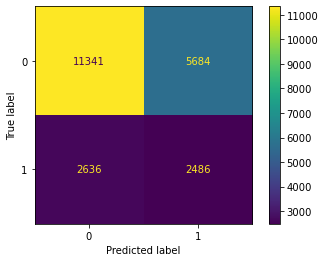

In [300]:
plot_confusion_matrix(log_reg, X_test, y_test)  
plt.show()

Results Analysis:
--

- Decrease in number of False Negatives
- Increase in number of False Positives
- Increase in number of True Positives
- Improvement on the class imbalance is positively impacting model performance

Question: How Will Changes In Test Size Impact SMOTE Data Model Performance 
--

- Here, I'm storing various model runs with varied test/training sizes
- This means that, each iteration, there is less data used for the SMOTE process
- I'd like to see how less SMOTE data impacts the overall scoring.

In [301]:
training_precision = []
testing_precision = []
training_recall = []
testing_recall = []
training_accuracy = []
testing_accuracy = []
training_f1 = []
testing_f1 = []

for i in range(30, 50):
    X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=i/100.0, random_state=42)
    X_train_smoted, y_train_smoted = smotr.fit_sample(X_train.values, y_train.values)
    logreg = LogisticRegression(fit_intercept=False, C=1e25, solver='liblinear')
    model_log = logreg.fit(X_train_smoted, y_train_smoted)
    y_hat_train = logreg.predict(X_train)
    y_hat_test = logreg.predict(X_test)

    training_precision.append(precision_score(y_train, y_hat_train))
    testing_precision.append(precision_score(y_test, y_hat_test))
    training_recall.append(recall_score(y_train, y_hat_train))
    testing_recall.append(recall_score(y_test, y_hat_test))
    training_accuracy.append(accuracy_score(y_train, y_hat_train))
    testing_accuracy.append(accuracy_score(y_test, y_hat_test))
    training_f1.append(f1_score(y_train, y_hat_train))
    testing_f1.append(f1_score(y_test, y_hat_test))


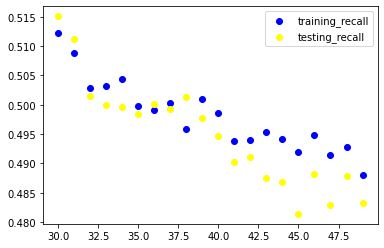

In [302]:
# Recall seems the most sensitive to SMOTE data

plt.scatter(list(range(30, 50)), training_recall, label='training_recall',color='blue')
plt.scatter(list(range(30, 50)), testing_recall, label='testing_recall', color='yellow')

plt.legend()
plt.show()

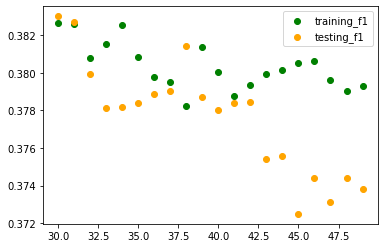

In [303]:
# F1 seems consistent despite the fluctuations in SMOTE data 

plt.scatter(list(range(30, 50)), training_f1, label='training_f1', color='green')
plt.scatter(list(range(30, 50)), testing_f1, label='testing_f1', color='orange')

plt.legend()
plt.show()

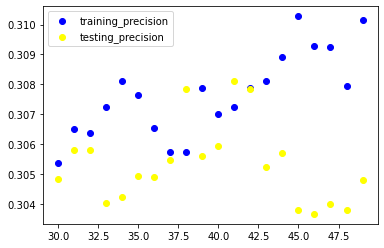

In [304]:
# Precision seems to have consistency, despite the change in SMOTE data size, actually appearing to trend upward

plt.scatter(list(range(30, 50)), training_precision, label='training_precision', color='blue')
plt.scatter(list(range(30, 50)), testing_precision, label='testing_precision', color='yellow')

plt.legend()
plt.show()

Next Move: Test Remaining Models
--

- Let's run the dataset through a few other models before doing any other tuning or adjustments.

---
---
---

Model #4: Bag of Trees -- Standard Model (No Tuning)
--

In [305]:
# Using Bagged Trees
bagged_tree = BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=5), 
                                 n_estimators=20)

In [306]:
# Using with SMOTE data
bag_clf = bagged_tree.fit(X_train_smoted, y_train_smoted)

In [307]:
# Model score for test data
bag_clf.score(X_test, y_test)

0.6114146385514968

Accuracy score is: 0.6114146385514968
---
F1 score is: 0.3783588558220168
Precision score is: 0.3002751662462738
Recall score is: 0.5113237016790316


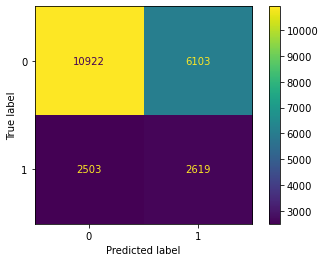

In [308]:
# Predictors
bag_pred = bag_clf.predict(X_test)

# F1, Precision, & Recall
scoring(y_test, bag_pred)

# Confusion Matrix
plot_confusion_matrix(bag_clf, X_test, y_test)  
plt.show()

Results Analysis:
--

- Increase in the # of True Positives (the best model so far)
- Increase in the # of True Negatives (the best model so far)
- Not the best, but not the worst for False Negatives
- So far, the highest # of False Positives

Thoughts + Next Steps:
- This model ought to be included in final 3 models to further Tune
- Relatively low F1, Precision & Recall scores remain, albeit they are remaining consistent
- This is on the TEST data, after doing SMOTE data operation

Model #5: Random Forests -- Standard Model (Max_Depth: 5)
--

In [309]:
forest = RandomForestClassifier(n_estimators=100, max_depth= 5)
forest_model = forest.fit(X_train_smoted, y_train_smoted)

In [310]:
forest_preds = forest_model.predict(X_test)

In [311]:
scoring(y_test, forest_preds)

Accuracy score is: 0.5755632817085835
---
F1 score is: 0.4060406925312776
Precision score is: 0.3001681614349776
Recall score is: 0.6272940257711831


<AxesSubplot:>

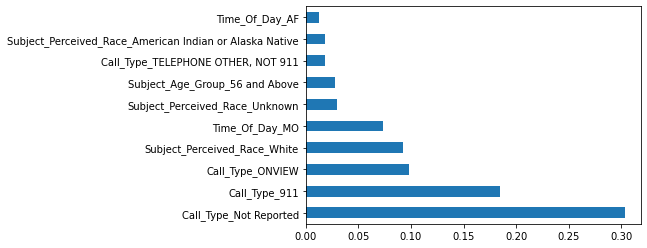

In [542]:
feat_impo = pd.Series(forest.feature_importances_, index=X_train.columns)
feat_impo.nlargest(10).plot(kind='barh')

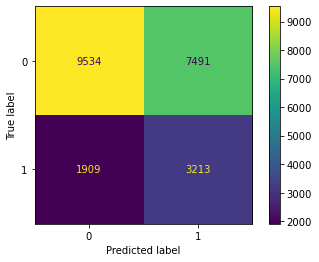

In [312]:
plot_confusion_matrix(forest_model, X_test, y_test)  
plt.show()

Results Analysis:
--

- The confusion matrix overall has performed the "best" with the highest # of True Positives
- However, the # of False Positives has increased as well

Thoughts + Next Steps:
- I'd like to know the feature importances at this point
- I'd like to run an XGBoost model to add dynamic

Model #6: XGBoost
--

- This will be the final standard model run before focusing my efforts
- This model may be apart of the top 3 by default just because of its ability to optimize

In [399]:
xgb_clf = xgb.XGBClassifier()

In [400]:
# Adjusting features and target for XGBoost, into DataFrame
smote_df_x = pd.DataFrame(X_train_smoted, columns=X_train.columns)
smote_df_y = pd.DataFrame(y_train_smoted, columns=y_train.columns)

In [401]:
xgb_clf_model = xgb_clf.fit(smote_df_x, smote_df_y)

In [402]:
xgb_preds = xgb_clf.predict(X_test)

In [403]:
scoring(y_test, xgb_preds)

Accuracy score is: 0.5816800649015414
---
F1 score is: 0.39685240323266696
Precision score is: 0.2983213429256595
Recall score is: 0.5925690695458876


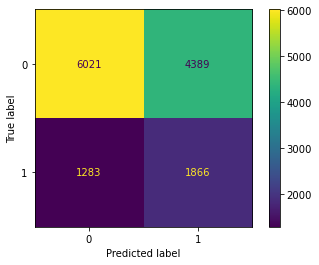

In [404]:
plot_confusion_matrix(xgb_clf_model, X_test, y_test)  
plt.show()

Results Analysis: XGBoost
--

- Reduces false positives and false negatives
- Precision score remains stable
- F1 & Recall scores remain stable

Evaluation of Work so Far:
--

- Established baseline model using Scikit dummies
- Run the following models: KNN, Decision Trees, Bag of Trees, Random Forests, Logistic Regression, XGBoost
- Higher accuracy scores + Low F1/Recall/Precision scores = Class Imbalance
- SMOTE Data to create X_train_smoted and y_train_smoted
- Seeing steady improvement (or stability) of F1/Recall/Precision
- Logistic Regression Visualization -- revealing justification for focus on the Recall score
- Identified initial features importance from Random Forests (Call Type: Not Reported)


Models for Further Focus:
- Random Forests: improve model and identify better feature importances if possible
- Logistic Regression: improve model and incorporate scaled data
- XGBoost: leverage the algorithm to improve model if possible, especially via GridSearch


Other Next Steps:
- Attempt to run models more efficiently by using functions & Pipeline
- Conduct hyperparameter tuning for the shortlisted models, using GridSearch
- Choose Final Model after evaluating the three finalist
- Perform K-fold cross validation during evaluation

---
---
---

Current Best Metrics:
--

Random Forests --
- F1(0.30)
- Precision(0.40)
- Recall(0.59)

In [463]:
# Train-test split version 2
X_train2, X_test2, y_train2, y_test2 = train_test_split(data, labels, test_size=0.30, random_state=333)

In [766]:
# SMOTE Data, after Scaling data
X_train_smoted2, y_train_smoted2 = smotr.fit_sample(X_train.values, y_train.values)

In [610]:
# Scale Data
scaler = StandardScaler()

scaled_smote_X_train2 = scaler.fit_transform(X_train_smoted2)
scaled_smote_X_test2 = scaler.transform(X_test2)

In [611]:
scaled_smote_X_train2

array([[-0.21230295, -0.51140285, -0.69880059, ..., -0.47900178,
        -0.46479718,  2.67443118],
       [-0.21230295,  1.95540561, -0.69880059, ..., -0.47900178,
        -0.46479718, -0.37391128],
       [-0.21230295, -0.51140285,  1.43102341, ..., -0.47900178,
         2.15147607, -0.37391128],
       ...,
       [-0.21230295, -0.51140285, -0.69880059, ..., -0.47900178,
        -0.46479718,  2.67443118],
       [-0.21230295, -0.51140285,  1.43102341, ..., -0.47900178,
        -0.46479718, -0.37391128],
       [-0.21230295, -0.51140285,  1.43102341, ..., -0.47900178,
        -0.46479718, -0.37391128]])

In [612]:
scaled_smote_X_train2 = pd.DataFrame(scaled_smote_X_train2, columns=X_train.columns)
y_train_smoted2 = pd.DataFrame(y_train_smoted2, columns=['Frisk_Flag'])

Hyperparamter Tuning via GridSearch: Random Forests
--

- Hyperparameter Tuning & Best Settings
- Cross-validation
- Feature Importance Visualization
- Updated confusion matrix + important scores

In [614]:
forest_clf = RandomForestClassifier(n_estimators=100, max_depth=5)
forest_clf.fit(scaled_smote_X_train2, y_train_smoted2)

RandomForestClassifier(max_depth=5)

In [615]:
# Feature Importances
forest_clf.feature_importances_

array([2.41472572e-03, 7.11551412e-03, 2.32442933e-03, 3.27022315e-03,
       9.12023769e-03, 1.44187980e-02, 3.60516210e-03, 1.74835604e-02,
       3.40008094e-03, 1.40261350e-02, 5.42672607e-03, 4.46910397e-03,
       2.42143031e-04, 5.39107063e-03, 5.42513888e-04, 3.32676144e-02,
       1.02615258e-01, 2.35025063e-01, 2.12896442e-03, 2.95147770e-01,
       7.46455947e-02, 0.00000000e+00, 2.10741545e-02, 1.49225485e-05,
       1.29829108e-02, 4.09248103e-03, 5.04347397e-02, 2.77706546e-03,
       3.90865497e-03, 1.15224222e-02, 1.20041479e-02, 2.88775471e-03,
       9.28325625e-03, 3.43428192e-03, 5.92382907e-03, 8.18838268e-03,
       6.02994842e-03, 9.36035874e-03])

In [616]:
forest_clf_preds = forest_clf.predict(X_test)

<AxesSubplot:>

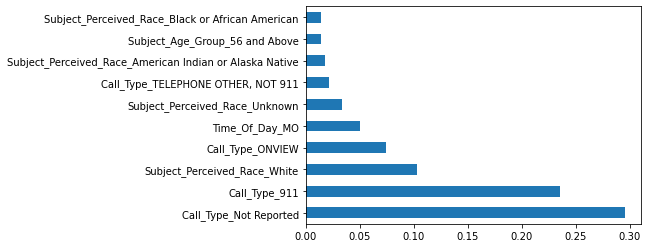

In [642]:
feat_imports = pd.Series(forest_clf.feature_importances_, index=X_train.columns)
feat_imports.nlargest(10).plot(kind='barh')

In [618]:
forest_clf_pred = forest_clf.predict(X_test)

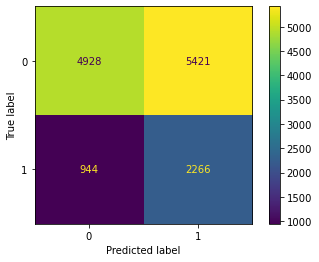

In [619]:
plot_confusion_matrix(forest_clf, X_test, y_test)  
plt.show()

In [620]:
scoring(y_test, forest_clf_pred)

Accuracy score is: 0.5305701010398997
---
F1 score is: 0.4158942828301367
Precision score is: 0.294783400546377
Recall score is: 0.7059190031152648


Results Analysis:
--

- True positives from first Random Forest model is better
- Recall score has increased significantly with SMOTE+Scaled data
- But, False Positives have increased (this could be why Precision score has fallen a bit)

Random Forests: GridSearchCV for Hyperparameter Tuning
--


In [647]:
rf_pipeline_1 = Pipeline([('RF', RandomForestClassifier(random_state=123))])

In [632]:
grid = [{'RF__max_depth': [3, 8, 15], 
         'RF__min_samples_split': [2, 4, 8], 
         'RF__min_samples_leaf': [1, 3, 5]}]

In [636]:
gridsearch = GridSearchCV(estimator=rf_pipeline_1, 
                          param_grid=grid, 
                          scoring='accuracy', 
                          cv=5)

In [637]:
gridsearch.fit(scaled_smote_X_train2, y_train_smoted2)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('RF',
                                        RandomForestClassifier(random_state=123))]),
             param_grid=[{'RF__max_depth': [3, 8, 15],
                          'RF__min_samples_leaf': [1, 3, 5],
                          'RF__min_samples_split': [2, 4, 8]}],
             scoring='accuracy')

In [638]:
gridsearch.score(X_test, y_test)

0.4989305996017405

In [646]:
gridsearch.best_params_

{'RF__max_depth': 15, 'RF__min_samples_leaf': 1, 'RF__min_samples_split': 4}

In [650]:
rf_pipeline_2 = Pipeline([('RF', RandomForestClassifier(n_estimators=100, random_state=123))])

grid2 = [{'RF__max_depth': [3, 8, 15], 
         'RF__min_samples_split': [2, 4, 8], 
         'RF__min_samples_leaf': [1, 3, 5]}]

In [653]:
gridsearch2 = GridSearchCV(estimator=rf_pipeline_2, 
                          param_grid=grid2, 
                          scoring='accuracy', 
                          cv=5)

In [654]:
gridsearch2.fit(scaled_smote_X_train2, y_train_smoted2)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('RF',
                                        RandomForestClassifier(random_state=123))]),
             param_grid=[{'RF__max_depth': [3, 8, 15],
                          'RF__min_samples_leaf': [1, 3, 5],
                          'RF__min_samples_split': [2, 4, 8]}],
             scoring='accuracy')

In [655]:
gridsearch2.best_params_

{'RF__max_depth': 15, 'RF__min_samples_leaf': 1, 'RF__min_samples_split': 4}

In [656]:
forest_clf = RandomForestClassifier(n_estimators=100, max_depth=15, min_samples_leaf=1, min_samples_split=4)
forest_clf.fit(scaled_smote_X_train2, y_train_smoted2)

RandomForestClassifier(max_depth=15, min_samples_split=4)

In [658]:
predi_forest = forest_clf.predict(X_test)

In [659]:
scoring(y_test, predi_forest)

Accuracy score is: 0.4946529980087027
---
F1 score is: 0.4033437826541275
Precision score is: 0.27991298042059465
Recall score is: 0.7214953271028037


<AxesSubplot:>

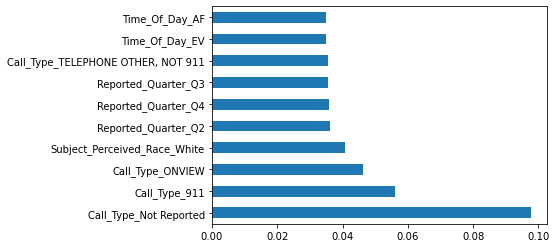

In [660]:
feat_imports_forest = pd.Series(forest_clf.feature_importances_, index=X_train.columns)
feat_imports_forest.nlargest(10).plot(kind='barh')

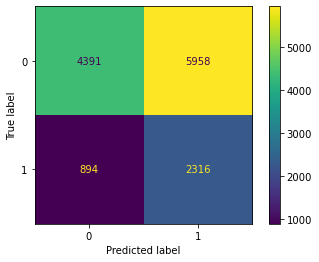

In [721]:
plot_confusion_matrix(forest_clf, X_test, y_test)  
plt.show()

Results Analysis:
--

- Based on hyperparameters given, the optimum parameters lead to a precision decrease, but an F1 and Recall increase.
- As well as an accuracy score decrease.


Logistic Regression Tuning
--

- Let's tune Logistic Regression by adjusting the 'solver' as well as the "c" value

In [661]:
log_reg2 = LogisticRegression(fit_intercept=False, C=1e12, solver='saga')
model_log2 = log_reg2.fit(X_train_smoted2, y_train_smoted2)

In [663]:
log_reg2_predictor = log_reg2.predict(X_test)

In [692]:
log_reg2.decision_function(X_test)

array([ 0.5875732 ,  0.08258837, -0.42332913, ..., -0.43911814,
        0.20098263,  0.12746691])

In [706]:
scoring(y_test, log_reg2_predictor)

Accuracy score is: 0.6160483811490522
---
F1 score is: 0.38724105461393593
Precision score is: 0.31119939462731744
Recall score is: 0.5124610591900312


Adjusting Parameters: Logistic Regression
--

In [718]:
# Saga solver and changing C to 50

log_reg3 = LogisticRegression(fit_intercept=False, C=50, solver='saga')
model_log3 = log_reg3.fit(X_train_smoted2, y_train_smoted2)

In [719]:
log3_preds = model_log3.predict(X_test)

In [720]:
scoring(y_test, log3_preds)

Accuracy score is: 0.6159746293974482
---
F1 score is: 0.38719548075791455
Precision score is: 0.3111405333837715
Recall score is: 0.5124610591900312


In [725]:
log_reg3.coef_

array([[ 1.73364827,  1.87693845,  1.77341461,  1.75605446,  1.6222294 ,
         1.36388917,  1.83946909, -1.40303187, -1.12564896, -0.74396131,
        -1.07357754, -1.29581283, -2.32278488, -0.9444583 , -1.48708177,
        -1.35866567, -1.05127692, -0.01401022, -0.90402868, -0.98686237,
        -0.62249987,  2.93942994, -0.60383629, -1.01213622,  0.16635559,
         0.3307997 , -0.03509909,  0.19665991,  0.09814551, -0.01060642,
        -0.04540361,  0.10357961, -0.6761281 , -0.66612791, -0.71326228,
        -0.73241404, -0.73100619, -0.76874808]])

In [730]:
prob_of_y2 = model_log3.predict_proba(X_test)

In [732]:
prob_of_y = [p[1] for p in prob_of_y2]

In [733]:
prob_of_y[:10]

[0.642808977647746,
 0.5206410310723258,
 0.3957216189741297,
 0.2926917323826629,
 0.2743995143010553,
 0.45617743987299064,
 0.30029732773837126,
 0.42379416223175664,
 0.48998520983242394,
 0.6281889044339483]

In [736]:
print(roc_auc_score(y_test, prob_of_y))

0.6149861575561201


GridSearch with XGBoost
--

- For the third model to adjust, I'll go with XGBoost.
- BUT, I'll be running non-SMOTE and non-scaled models through with Pipeline, to get an additional angle of insight.

In [778]:
modelo = xgb.XGBClassifier()

pipeline = Pipeline([
    ('standard_scaler', StandardScaler()), 
    ('model', modelo)
])

param_grid = {
    
    'model__max_depth': [3, 5, 8, 15],
    'model__n_estimators': [10, 100, 300],
}

grid = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, scoring='roc_auc')

In [779]:
grid.fit(X_train_smoted2, y_train_smoted2)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standard_scaler', StandardScaler()),
                                       ('model', XGBClassifier())]),
             n_jobs=-1,
             param_grid={'model__max_depth': [3, 5, 8, 15],
                         'model__n_estimators': [10, 100, 300]},
             scoring='roc_auc')

In [780]:
grid.best_params_

{'model__max_depth': 15, 'model__n_estimators': 100}

In [789]:
grid.cv_results_

{'mean_fit_time': array([  1.01348844,   6.62407894,  26.40975108,   1.83648591,
         28.05734625,  38.43757706,   2.37983198,  19.99949908,
         65.56580529,   4.74889417,  62.94334869, 193.88698354]),
 'std_fit_time': array([2.40306886e-02, 1.07569879e-01, 9.59017849e+00, 3.49521364e-01,
        4.77251489e+00, 4.22722422e+00, 2.16133608e-01, 2.94073806e+00,
        5.94378021e+00, 3.79388629e-01, 2.17887614e+01, 2.83595064e+01]),
 'mean_score_time': array([0.02353749, 0.05146322, 0.17353678, 0.02772627, 0.11549091,
        0.21462722, 0.02852492, 0.12466726, 0.4256619 , 0.03909616,
        0.71383724, 3.13256459]),
 'std_score_time': array([0.00293187, 0.00590413, 0.033786  , 0.00353341, 0.02772145,
        0.01462077, 0.00256983, 0.00302512, 0.02511538, 0.00132255,
        0.26947421, 0.21979469]),
 'param_model__max_depth': masked_array(data=[3, 3, 3, 5, 5, 5, 8, 8, 8, 15, 15, 15],
              mask=[False, False, False, False, False, False, False, False,
                

In [790]:
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__max_depth,param_model__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.013488,0.024031,0.023537,0.002932,3,10,"{'model__max_depth': 3, 'model__n_estimators':...",0.604124,0.644769,0.663477,0.663242,0.662103,0.647543,0.022827,12
1,6.624079,0.107570,0.051463,0.005904,3,100,"{'model__max_depth': 3, 'model__n_estimators':...",0.613899,0.692917,0.742060,0.740978,0.735592,0.705089,0.049090,10
2,26.409751,9.590178,0.173537,0.033786,3,300,"{'model__max_depth': 3, 'model__n_estimators':...",0.620105,0.730416,0.818326,0.817840,0.813938,0.760125,0.077592,8
3,1.836486,0.349521,0.027726,0.003533,5,10,"{'model__max_depth': 5, 'model__n_estimators':...",0.607247,0.667653,0.705113,0.704158,0.698177,0.676470,0.037223,11
4,28.057346,4.772515,0.115491,0.027721,5,100,"{'model__max_depth': 5, 'model__n_estimators':...",0.629541,0.744443,0.856033,0.857138,0.852737,0.787978,0.090118,7
5,38.437577,4.227224,0.214627,0.014621,5,300,"{'model__max_depth': 5, 'model__n_estimators':...",0.634832,0.768728,0.898399,0.898916,0.897005,0.819576,0.105090,5
6,2.379832,0.216134,0.028525,0.002570,8,10,"{'model__max_depth': 8, 'model__n_estimators':...",0.627431,0.710562,0.767350,0.768181,0.768368,0.728379,0.055154,9
7,19.999499,2.940738,0.124667,0.003025,8,100,"{'model__max_depth': 8, 'model__n_estimators':...",0.647659,0.777701,0.906808,0.910029,0.904686,0.829377,0.103792,4
8,65.565805,5.943780,0.425662,0.025115,8,300,"{'model__max_depth': 8, 'model__n_estimators':...",0.646264,0.782096,0.918303,0.924691,0.919797,0.838230,0.110039,3
9,4.748894,0.379389,0.039096,0.001323,15,10,"{'model__max_depth': 15, 'model__n_estimators'...",0.676544,0.766455,0.871123,0.877426,0.868011,0.811912,0.079166,6


In [788]:
grid.cv_results_['mean_test_score']

array([0.64754277, 0.70508913, 0.76012488, 0.67646959, 0.78797833,
       0.81957606, 0.72837853, 0.82937671, 0.8382303 , 0.81191193,
       0.8478318 , 0.8428196 ])

In [796]:
# Applying best params to XGBoost with SMOTE Data

xgb_clf = xgb.XGBClassifier(max_depth=15, n_estimators=100)

In [797]:
xgb_model = xgb_clf.fit(X_train_smoted2, y_train_smoted2)

In [798]:
xgb_pred2 = xgb_model.predict(X_test.values)

In [799]:
scoring(y_test, xgb_pred2)

Accuracy score is: 0.6610369496275537
---
F1 score is: 0.32728337236533955
Precision score is: 0.3086692435118719
Recall score is: 0.3482866043613707


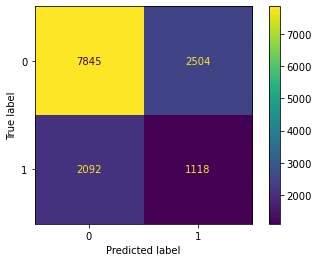

In [800]:
plot_confusion_matrix(xgb_model, X_test.values, y_test.values)  
plt.show()

Results Analysis: Random Forests is the Winning Model
--

Key Insights:

- Hyperparameter Tuning / GridSearchCV used
- Highest Recall score achieved (0.70), but Precision score suffered (0.29)
- Feature of most importance: 'Not Reported' Call Type
- Because this feature fails to reveal much, more insights are needed
- However, the data is showing that the Call Type has the strongest influence on whether someone is frisked

Overall Conclusion + Recommendation:
--

- The dataset features did not prove effective in achieving acceptable model performance
- Over + Under sampling of dataset with SMOTE data is recommended, based on difficulties with Precision and F1 scores
- Generally: increase in True Positives gave way to increase in False Positives
- It cannot be concluded at the moment that there is "Frisk" bias with this Terry stop data